In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
# Duplicated from the nonparametrics notes
N_test = 500
N_train = 150

np.random.seed(2021)

# Create a training dataset
x1_train = np.random.uniform(-1, 1, N_train)
x2_train = np.random.uniform(-1, 1, N_train)

y_train = (x1_train * x2_train > 0).astype(np.int64)

# Create a feature matrix that we can use for classification
X_train = np.vstack([x1_train, x2_train]).transpose()


# Create a test dataset
x1_test = np.random.uniform(-3, 3, N_test)
x2_test = np.random.uniform(-3, 3, N_test)

y_test = (x1_test * x2_test > 0).astype(np.int64)

# Create a feature matrix that we can use to evaluate
X_test = np.vstack([x1_test, x2_test]).transpose()

def draw_results(x1, x2, color, plot_title=''):
    plt.figure()
    plt.scatter(x1, x2, c=color, cmap='viridis', alpha=0.7);
    plt.colorbar()
    plt.title(plot_title)
    plt.axis('equal')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.tight_layout()

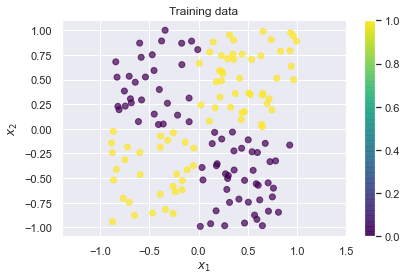

In [23]:
draw_results(x1_train, x2_train, color=y_train, plot_title='Training data')
#draw_results(x1_test, x2_test, color=y_test, plot_title='Test data (ground truth)')

### Logistic regression

Define $p$ as $P(y = 1)$. Then logistic regression says:

$$
p = \sigma(\beta_1 x_1 + \beta_2 x_2) \\
\underbrace{\log\left(\frac{p}{1-p}\right)}_{\text{logit: inverse sigmoid}} = \beta_1 x_1 + \beta_2 x_2
$$

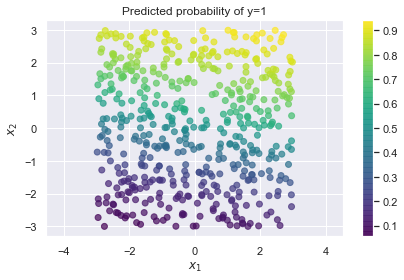

In [4]:
from sklearn.linear_model import LogisticRegression

# Create and fit a scikit-learn logistic regression model on training set
model_logistic = LogisticRegression(penalty='none', solver='lbfgs')
model_logistic.fit(X_train, y_train)

# Use the model to predict on the test set
probs = model_logistic.predict_proba(X_test)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)


# Visualize the results
draw_results(
    x1_test, x2_test, color=probs, 
    plot_title="Predicted probability of y=1"
)

In [7]:
model_logistic.coef_

array([[0.14617069, 0.80642215]])

Accuracy on training set: 0.95


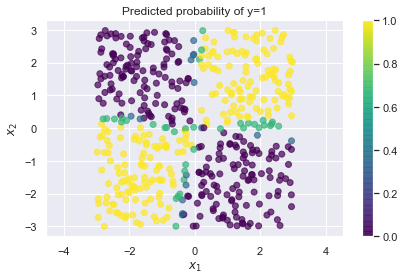

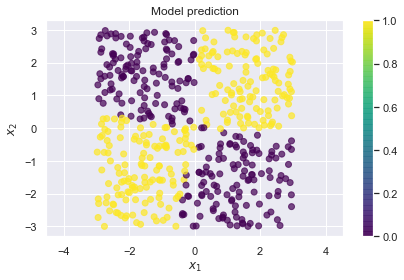

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

probs = model_knn.predict_proba(X_test)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)


draw_results(
    x1_test, x2_test, color=probs, 
    plot_title="Predicted probability of y=1"
)

draw_results(
    x1_test, x2_test, color=y_hat, 
    plot_title="Model prediction"
)

accuracy = np.mean(y_test == y_hat)
print(f"Accuracy on training set: {accuracy}")

Accuracy on training set: 0.996


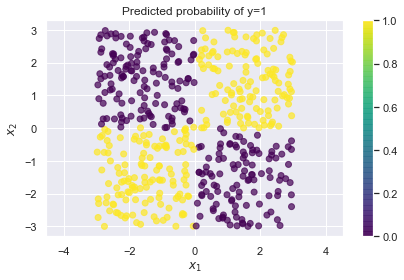

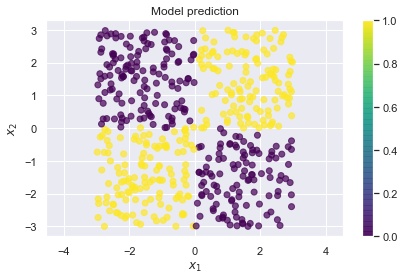

In [9]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

probs = model_tree.predict_proba(X_test)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)


draw_results(
    x1_test, x2_test, color=probs, 
    plot_title="Predicted probability of y=1"
)

draw_results(
    x1_test, x2_test, color=y_hat, 
    plot_title="Model prediction"
)

accuracy = np.mean(y_test == y_hat)
print(f"Accuracy on training set: {accuracy}")

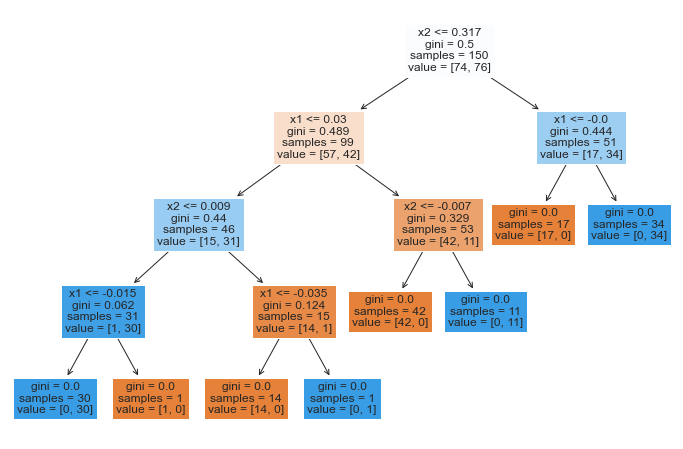

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model_tree, fontsize=12, filled=True, feature_names=['x1', 'x2']);

<IPython.core.display.Javascript object>


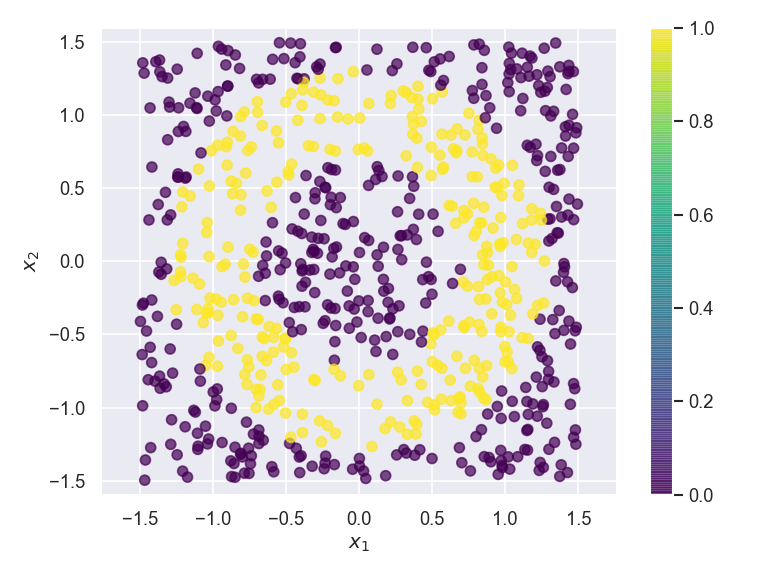

In [8]:
import pandas as pd
ring = pd.read_csv('ring.csv')
# Pull out numpy arrays for X and y from the dataframe
X = ring.loc[:, ['x1', 'x2']].values
y = ring.y.values
draw_results(ring.x1, ring.x2, color=y)

<IPython.core.display.Javascript object>


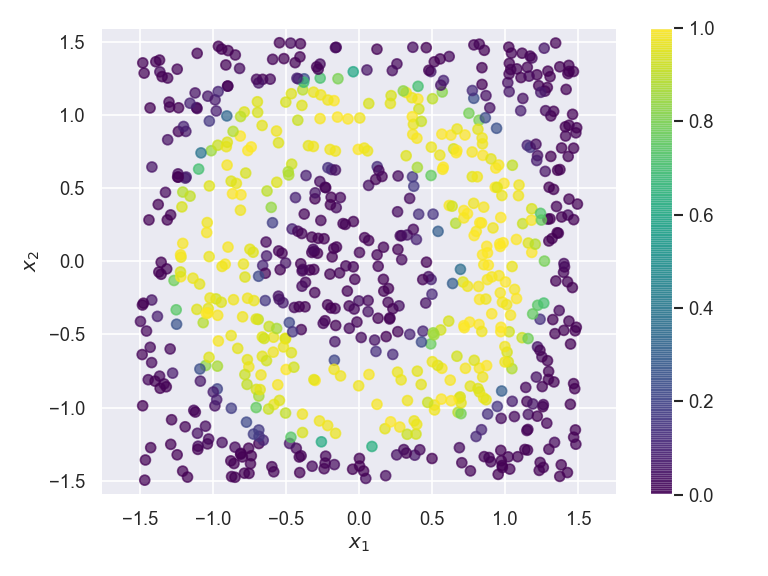

In [9]:
from sklearn.ensemble import RandomForestClassifier

ring_forest = RandomForestClassifier()
ring_forest.fit(X, y)

probs = ring_forest.predict_proba(X)[:, 1]
predictions = probs > 0.5

draw_results(ring.x1, ring.x2, color=probs)